In [2]:
import math
import matplotlib
import requests
import bs4
import pandas as pd
import geopandas
from IPython.display import display

# 1.Получение данных об аэропортах, их координатах и пассажиротоках 

In [3]:
TEMP_URL = "https://ru.wikipedia.org/"

Функция для преобразования координат с сайта https://ru.wikipedia.org в десятичный формат:

In [4]:
def coord_proc(str_):
    
    str_ = str_[:str_.index(':')].split('_')
    if len(str_) == 9:
        str_[2] = 0
        str_[6] = 0
    #print(str_)
    if len(str_) == 5:
        lat = float(str_[0])
        if str_[1] == 'S':
            lat *= -1
        lon = float(str_[2])
        if str_[3] == 'W':
            lon *= -1
    else:
        lat = float(str_[0]) + float(str_[1]) / 60 + float(str_[2]) / 3600
        if str_[3] == 'S':
            lat *= -1
        lon = float(str_[4]) + float(str_[5]) / 60 + float(str_[6]) / 3600
        if str_[7] == 'W':
            lon *= -1
        
    return([lat, lon])

Заполнение таблицы необходимыми данными для Индостана:

In [5]:
ind_df = pd.DataFrame(columns=['city', 'coordinates', 'passenger traffic'])

In [6]:
def data_ind():
    
    url_ind = 'https://ru.wikipedia.org/wiki/Список_аэропортов_Индии'
    
    response = requests.get(url=url_ind)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    find = soup.find("table", class_='wikitable')
    
    for i in range(2, 56, 2):
        
        passenger_traffic_i = find.contents[1].contents[i].contents[11].contents[0]
        passenger_traffic_i = passenger_traffic_i[:len(passenger_traffic_i)-1].split(' ')
        #print(passenger_traffic_i)
        if len(passenger_traffic_i) < 3:
            passenger_traffic_i = int(passenger_traffic_i[0]) * pow(10, 3) + int(passenger_traffic_i[1])
        else:
            passenger_traffic_i = int(passenger_traffic_i[0]) * pow(10, 6) + int(passenger_traffic_i[1]) * pow(10, 3) + int(passenger_traffic_i[2])
        
        city_i = find.contents[1].contents[i].contents[3].contents[0]['title']
        
        url_i = TEMP_URL + find.contents[1].contents[i].contents[3].contents[0]['href']
        
        response_i = requests.get(url=url_i)
        soup_i = bs4.BeautifulSoup(response_i.text, 'html.parser')
        find_i = soup_i.find("span", class_='coordinates plainlinks nourlexpansion')
        
        coordinates_i = coord_proc(find_i['data-param'])
        
        ind_df.loc[int((i-2)/2)] = [city_i, coordinates_i, passenger_traffic_i]

In [7]:
data_ind()

Демонстрация датасета:

In [8]:
#display(ind_df)

Нормирование пассажиропотока:

In [9]:
sum_p = ind_df['passenger traffic'].sum()
ind_df['passenger traffic'] = ind_df['passenger traffic'] / sum_p
display(ind_df)

,city,coordinates,passenger traffic
0,Нью-Дели,"[28.7, 77.2]",0.216311
1,Мумбаи,"[18.966666666666665, 72.83333333333333]",0.187026
2,Бангалор,"[12.966666666666667, 77.56666666666666]",0.0839092
3,Ченнаи (аэропорт),"[12.983333333333333, 80.16666666666667]",0.0683494
4,Хайдарабад (Индия),"[17.366666666666667, 78.46666666666667]",0.0537752
5,Калькутта,"[22.8, 88.36666666666666]",0.0535778
6,Коччи,"[9.966666666666667, 76.28333333333333]",0.0343214
7,Ахмадабад,"[23.033333333333335, 72.61666666666666]",0.0283824
8,Тривандрам,"[8.5, 76.88333333333334]",0.0279151
9,Лакхнау,"[26.85, 80.9]",0.0260727


Заполнение таблицы необходимыми данными для ЕС:

In [10]:
eu_df = pd.DataFrame(columns=['country', 'airport coordinates', 'passenger traffic'])

In [11]:
def data_eu():
    country_eu = {'Австрия', 'Бельгия', 'Болгария', 'Великобритания', 'Венгрия', 'Германия', 'Греция', 'Дания',
                 'Ирландия', 'Испания', 'Италия', 'Кипр', 'Латвия', 'Литва', 'Люксембург', 'Мальта', 
                 'Нидерланды', 'Польша', 'Португалия', 'Румыния', 'Словакия', 'Словения', 'Финляндия',
                 'Франция', 'Хорватия', 'Чехия', 'Швеция', 'Эстония'}
    unknown_airports = [71, 77, 79, 81, 82, 91, 93, 95, 96, 100]
    
    url_eu = 'https://ru.wikipedia.org/wiki/Список_наиболее_загруженных_аэропортов_Европы'
    response = requests.get(url=url_eu)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    find = soup.find("table", class_='wikitable sortable')
    
    k = 0
    for i in range(2, 202, 2):
        passenger_traffic_i = find.contents[1].contents[i].contents[11].contents[0].split(',')
        #print(passenger_traffic_i)
        city_i = find.contents[1].contents[i].contents[3].contents[2]['title']
        if city_i not in country_eu or i/2 in unknown_airports:
            continue
        url_i = TEMP_URL + find.contents[1].contents[i].contents[5].contents[0]['href']
        response_i = requests.get(url=url_i)
        soup_i = bs4.BeautifulSoup(response_i.text, 'html.parser')
        find_i = soup_i.find("span", class_='coordinates plainlinks nourlexpansion')
        #print(i/2, find_i['data-param'])
        coordinates_i = coord_proc(find_i['data-param'])
        eu_df.loc[k] = [city_i, coordinates_i,(int(passenger_traffic_i[0]) + 0.1 * int(passenger_traffic_i[1]))*1000000]
        k += 1
        #eu_df.iloc[0] = [for i in range(1, 101)]
        

In [12]:
data_eu()

Демонстрация датасета:

In [13]:
pd.set_option('display.max_rows', 100)
#display(eu_df)

Нормирование пассажиропотока:

In [14]:
sum_p = eu_df['passenger traffic'].sum()
eu_df['passenger traffic'] = eu_df['passenger traffic'] / sum_p
display(eu_df)

,country,airport coordinates,passenger traffic
0,Великобритания,"[51.46666666666667, -0.45]",0.056702
1,Франция,"[49.0, 2.533333333333333]",0.049747
2,Германия,"[50.03333333333333, 8.566666666666666]",0.046118
3,Нидерланды,"[52.3, 4.75]",0.044077
4,Испания,"[40.483333333333334, -3.5666666666666664]",0.035382
5,Германия,"[48.35, 11.783333333333333]",0.030997
6,Италия,"[41.8, 12.25]",0.030619
7,Великобритания,"[51.13333333333333, -0.18333333333333332]",0.030468
8,Испания,"[41.28333333333333, 2.066666666666667]",0.030014
9,Франция,"[48.723333, 2.379444]",0.022454


# 2. Задание целевой функции и ее минимизация

Функция затрат топлива имеет вид: $\sum_{i=1}^n e^{c*r(h, a_i)*p_i}$, где $r(h, a_i)$ - расстояние между хабом $h$ и аэропортом $a_i$, $p_i$ - величина пассажиропотока, $c$ - константа, минимизируем по $h$

Функция вычисления геодезического расстояния между двумя аэропортами:

In [15]:
def geodetic_range(coord_1, coord_2):
    
    rad = 6371.3
    b1 = coord_1[0] * math.pi / 180
    b2 = coord_2[0] * math.pi / 180
    l1 = coord_1[1] * math.pi / 180
    l2 = coord_2[1] * math.pi / 180
    
    x1 = rad * math.cos(b1) * math.cos(l1)
    y1 = rad * math.cos(b1) * math.sin(l1)
    z1 = rad * math.sin(b1)
    
    x2 = rad * math.cos(b2) * math.cos(l2);
    y2 = rad * math.cos(b2) * math.sin(l2);
    z2 = rad * math.sin(b2);
    
    dist = pow(pow((x2 - x1), 2) + pow((y2 - y1), 2) + pow((z2 - z1), 2), 1 / 2)
    alfa = 2 * math.asin(pow(dist, 2) / (2 * pow(rad, 2)))

    return rad * alfa/1000

Целевая функция:

In [16]:
def func(coord_h):
    
    sum = 0
    for i in range(0, 70):
        sum += math.exp(geodetic_range(eu_df['airport coordinates'][i], coord_h) * eu_df['passenger traffic'][i])
    
    for i in range(0, 26):
        sum += math.exp(geodetic_range(ind_df['coordinates'][i], coord_h) * ind_df['passenger traffic'][i])
    #print(sum, ' сумма общая', '\n')
    return sum
        

Задание отрезков для поиска оптимума методом золотого сечения и начальной точки для координатного спуска:

In [52]:
lon_for_golden_ratio = [25.0, 70.0] #отрезок для долготы [26.4, 70]
lat_for_golden_ratio = [20.0, 50.0] #отрезок для широты [20, 43]
prosp_h = [35.0, 45.0] #предполагаемое положение хаба

Метод золотого сечения для одномерной оптимизации:

In [53]:
phi = 0.5 * (1.0 + pow(5.0, 1/2))

def golden_ratio(f, a, b, n, coord_h):
    
    eps = 0.000001
    if abs(a - b) < eps:
        return 0.5 * (a + b)
    else:
        t = (b - a) / phi
        B,A = b - t, a + t
        if n == 0:
            if f([B, coord_h[1]]) >= f([A, coord_h[1]]): 
                 return golden_ratio(f, B, b, n, coord_h)
            else:
                return golden_ratio(f, a, A, n, coord_h)
        else:
            if f([coord_h[0], B]) >= f([coord_h[0], A]): 
                 return golden_ratio(f, B, b, n, coord_h)
            else:
                return golden_ratio(f, a, A, n, coord_h)
            

Метод покоординатного спуска:

In [54]:
def coordinate_descend(f, coord_h):
    
    eps = 0.000001
    coord_h_new = coord_h
    for i in range(10):
        coord_h_old = list(coord_h_new[:])
        coord_h_new[0] = golden_ratio(f, lat_for_golden_ratio[0], lat_for_golden_ratio[1], 0, coord_h_old)
        coord_h_new[1] = golden_ratio(f, lon_for_golden_ratio[0], lon_for_golden_ratio[1], 1, coord_h_new)
        
        if abs(f(coord_h_new) - f(coord_h_old)) < eps:
            break
    return coord_h_new

Координаты хаба в десятичных градусах широты и долготы:

In [55]:
coordinate_descend(func, prosp_h)

[38.97246516665555, 50.40503096131384]

Местоположение хаба на карте мира, отмеченное красной точкой:

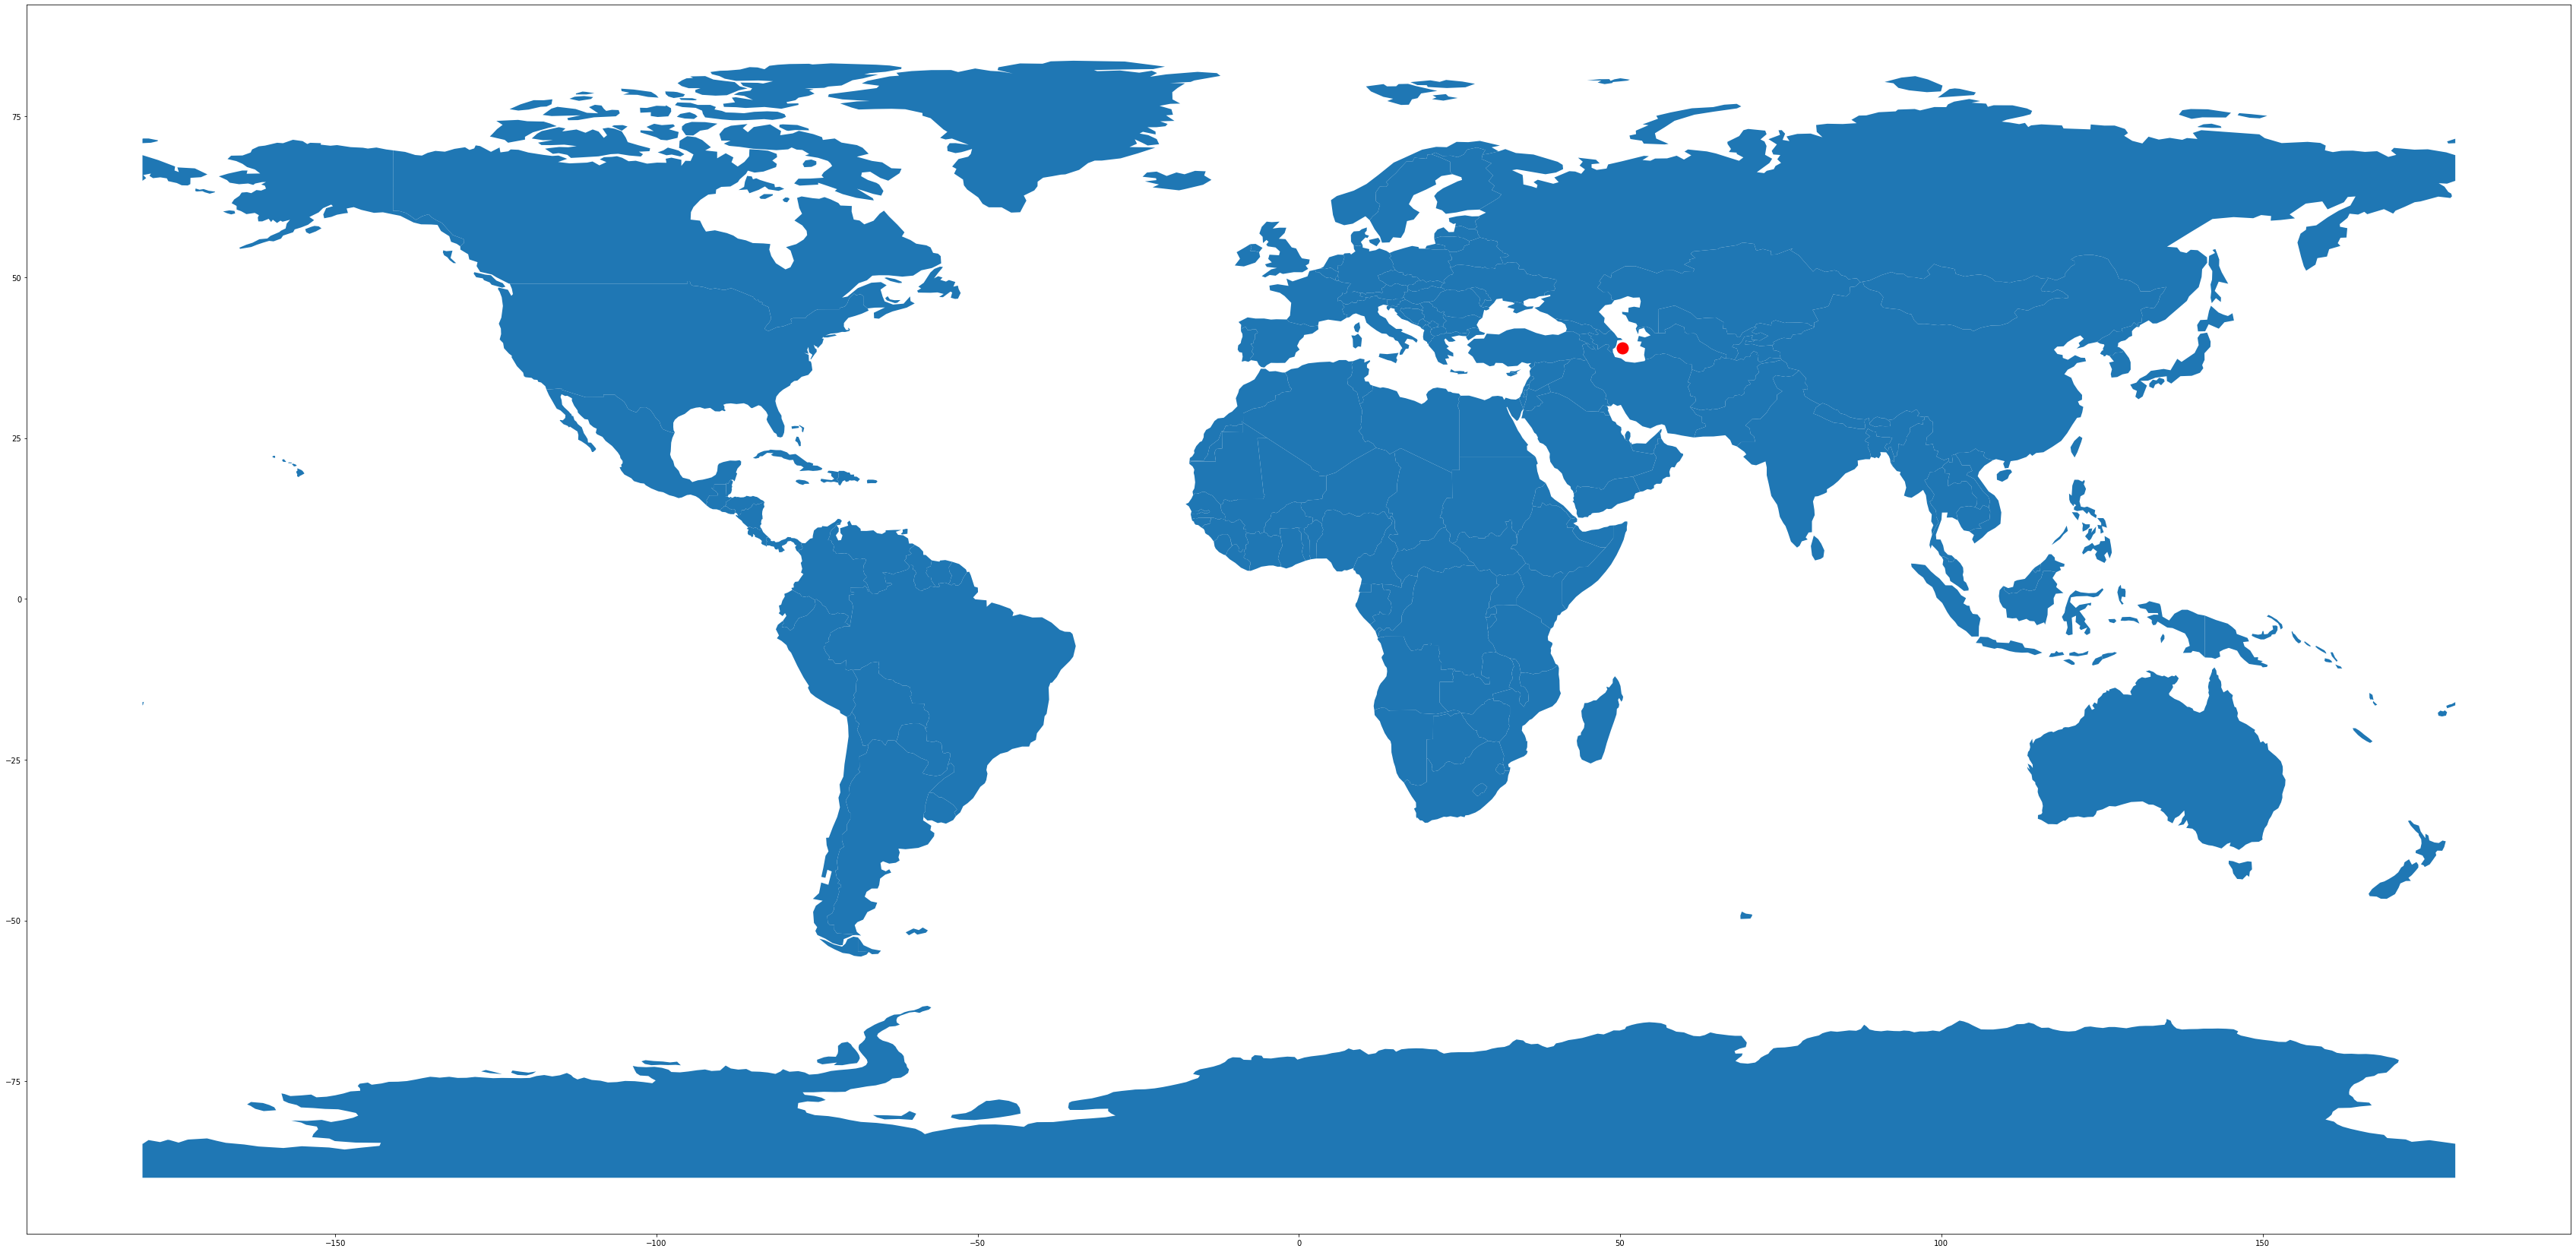

In [56]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(60,60))
matplotlib.pyplot.plot(50.40503096131384, 38.97246516665555, marker='o', color='red', markersize=15)